## Shape-diff AE Recon

2212 45049 neighbor_00_45049


<IPython.core.display.Javascript object>


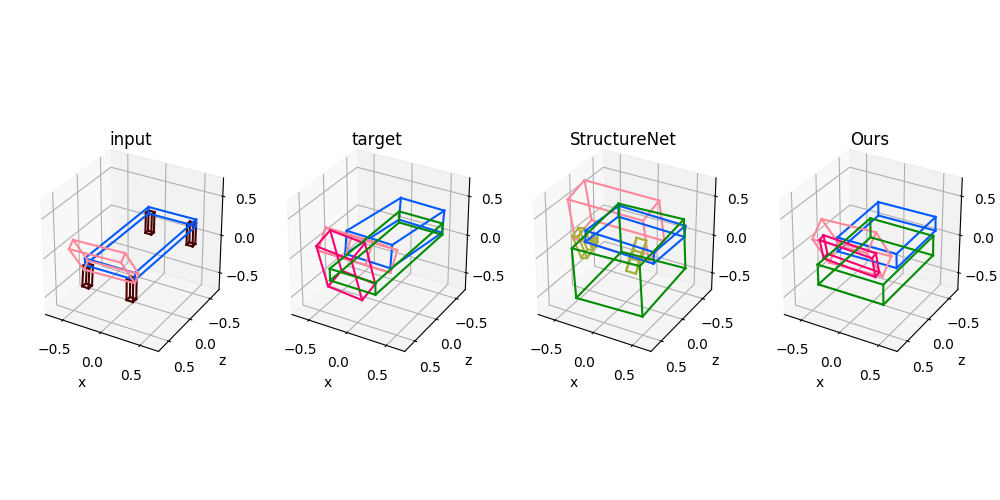

cd: 0.076953
sd: 0.000000

Source Shape:
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_single_surface [LEAF] {3}
  ├1 chair_seat    {4}
  |  ├0 seat_surface    {5}
  |  |  ├0 seat_single_surface [LEAF] {6}
  ├2 chair_base    {7}
  |  ├0 regular_leg_base    {8}
  |  |  ├0 leg [LEAF] {9}
  |  |  ├1 leg [LEAF] {10}
  |  |  ├2 leg [LEAF] {11}
  |  |  ├3 leg [LEAF] {12}


Target Shape:
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_surface    {2}
  |  |  ├0 back_single_surface [LEAF] {3}
  |  ├1 back_support [LEAF] {4}
  ├1 chair_seat    {5}
  |  ├0 seat_surface    {6}
  |  |  ├0 seat_single_surface [LEAF] {7}
  ├2 chair_base [LEAF] {8}


StructureNet Recon Shape:
0 chair    {0}
  ├0 chair_back    {1}
  |  ├0 back_connector [LEAF] {0}
  |  ├1 back_connector [LEAF] {0}
  |  ├2 back_surface    {2}
  |  |  ├0 back_single_surface [LEAF] {3}
  |  ├3 back_connector [LEAF] {0}
  ├1 chair_seat [LEAF] {5}
  ├2 chair_base [LEAF] {8}


StructEdit Recon Shape:
0 

In [17]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

# results directory
data_dir = '../data/partnetdata/chair_hier'
root_dir = '../data/results/exp_ae_chair_cd_recon'
sn_dir = '../data/results/exp_structurenet_ae_chair_recon'
obj_idx = 8
neighbor_id = 0

# read all data
obj_list = sorted([item for item in os.listdir(root_dir) if '.' not in item])

# visualize one data
anno_id = obj_list[obj_idx]

cond_obj = PartNetDataset.load_object(os.path.join(data_dir, anno_id+'.json'))

neighbor_list = sorted([item.split('.')[0] for item in os.listdir(os.path.join(root_dir, anno_id)) if item.endswith('.stats')])
neighbor_anno_id = neighbor_list[neighbor_id].split('_')[-1]
print(anno_id, neighbor_anno_id, neighbor_list[neighbor_id])

orig_obj2 = PartNetDataset.load_object(os.path.join(data_dir, neighbor_anno_id+'.json'))
recon_obj2 = PartNetDataset.load_object(os.path.join(root_dir, anno_id, neighbor_list[neighbor_id]+'.recon.json'))

sn_recon_obj2 = PartNetDataset.load_object(os.path.join(sn_dir, neighbor_anno_id, 'recon.json'))

draw_partnet_objects(objects=[cond_obj, orig_obj2, sn_recon_obj2, recon_obj2], 
                     object_names=['input', 'target', 'StructureNet', 'Ours'],
                     figsize=(10, 5), leafs_only=True, visu_edges=False,
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')

with open(os.path.join(root_dir, anno_id, neighbor_list[neighbor_id]+'.stats'), 'r') as fin:
    print(fin.readline().rstrip())
    print(fin.readline().rstrip())

# show source/target shapes and orig/recon shape-diff representations
print('\nSource Shape:')
print(cond_obj)
print('\nTarget Shape:')
print(orig_obj2)
print('\nStructureNet Recon Shape:')
print(sn_recon_obj2)
print('\nStructEdit Recon Shape:')
print(recon_obj2)

print('\nOrig Shape-Delta:')
with open(os.path.join(root_dir, anno_id, neighbor_list[neighbor_id]+'.orig.diff'), 'r') as fin:
    for l in fin.readlines():
        print(l.rstrip())

print('\nRecon Shape-Delta:')
with open(os.path.join(root_dir, anno_id, neighbor_list[neighbor_id]+'.recon.diff'), 'r') as fin:
    for l in fin.readlines():
        print(l.rstrip())